# Introduction

#### **Spolier Ahead:** This notebook will not help you to get good score, but just to get clarification on Statistics.

Welcome to Tabular Playground Series for June 2022. This month's competition is quite interesting, where we don't need to predict output as such, but we need to predict missing values of the dataset. Thus missing values becomes our output variables.

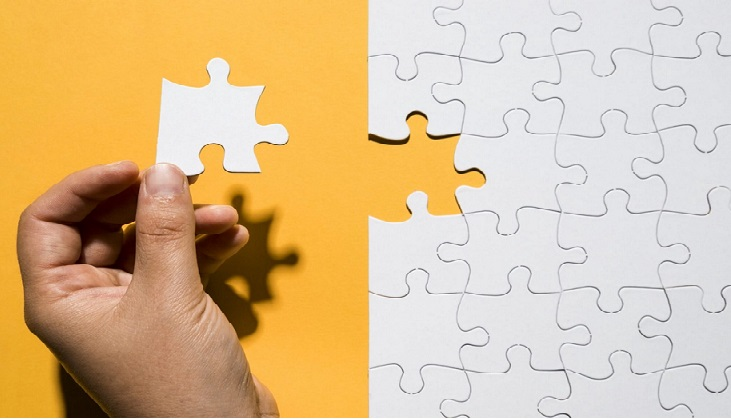

We do have a few techniques, which can be used for imputing missing data.

1. **Statistics methods:** We can do data impute with using Mean/Mode/Median methods.Mean can be used if data doesn't have outliers or data is symmetric. Median can be used if data have outliers or data is skewed. We can use a box plot to see if data have outliers, and a histogram to check whether is skewed or symmetric. Mode is generally used for categorical data.
1. **Python libraries:** Sklearn python library has functionality SimpleImputer which helps to impute data. Check the below link,

    https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

1. **Using Machine Learning Algorithms:** We can use a machine learning model to learn the pattern between the data and predict the missing values. This method ensures that the estimation of the missing values will not lead to data leakage.

This notebook take help of statistics method, and we will use mean, mode, and median methods for data imputation.

### Advantages: 
* It is an easy and fast way to handle the missing data.

### Disadvantages:
* It might lead to data leakage and does not factor the covariance between features. 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline 

In [ ]:
data_df = pd.read_csv('../input/tabular-playground-series-jun-2022/data.csv')

In [ ]:
data_df.info()

In [ ]:
data_df.describe()

In [ ]:
data_df.head()

In [ ]:
pd.set_option('display.max_rows', None)
n = data_df.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

In [ ]:
def missing_data(train_set):
    nan_percent = train_set.isnull().sum() #100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : 'Missing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [ ]:
miss = missing_data(data_df)
miss

In [ ]:
features = [x for x in data_df.columns if x !='row_id']

In [ ]:
ncols = 4
for i, f in enumerate(features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Data Symmetry check', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(data_df[f], bins=200)
    plt.xlabel(f)
plt.show()

**Observations:**

1. **F_1** series column have normally distributed data as it follow Bell curve shape, except F_1_12, & F_1_13 column which have left skewed data.
1. **F_2** series column have right skewed data.
1. **F_3** series column have normally distributed data except F_3_19, & F_3_21 column which have left skewed data.
1. **F_4** selecies column have both right skewed data and normally disctributed data.

Lets understand different distribution, we have in Statistics.
Data generally distributed in 3 way,
1. **Normally Distributed:** A type of distribution in which values are symmetrically distributed with no skew. Most values cluster around a central region. Normally distributed data follows Bell Curve shape.
1. **Left Skewed Or Negatively skewed:** A type of distribution in which more values are concentrated on the right side of the distribution graph while the left tail of the distribution graph is longer. **Ex.** The distribution of age of deaths. The distribution of the age of deaths in most populations is left-skewed. Most people live to be between 70 and 80 years old, with fewer and fewer living less than this age.
1. **Right Skewed or Positively Skewed:** A type of distribution in which more values are concentrated on the left side of the distribution graph while the right tail of the distribution graph is longer. **Ex.** The distribution of household incomes in the U.S. is right-skewed, with most households earning between $40k and $80k per year but with a long right tail of households that earn much more.


Check below figure,
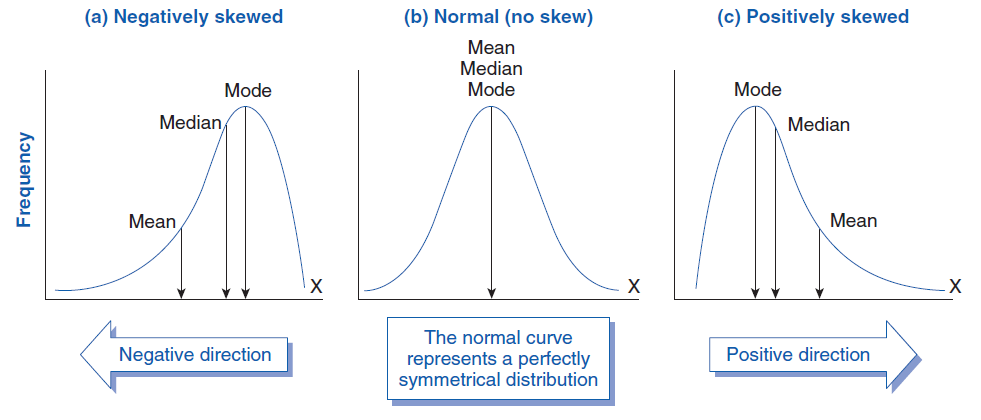

In [ ]:
ncols = 4
for i, f in enumerate(features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Outlier check', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    sns.boxplot(data=data_df[f])
    plt.xlabel(f)
plt.show()

In [ ]:
def Handle_outliers():
    for f in features:
        # IQR
        Q1, Q3 = np.nanpercentile(data_df[f], [25,75])
        IQR = Q3 - Q1
        upper = Q3 +1.5*IQR
        lower = Q1 - 1.5*IQR
        print(f, Q1, Q3, IQR, upper)
        #data_df[f] = np.where(data_df[f] > upper, upper,data_df[f])
        data_df.loc[data_df[f] < lower,f] = lower
        data_df.loc[data_df[f] > upper,f] = upper


In [ ]:
Handle_outliers()

In [ ]:
data_df.head(5)

In [ ]:
plt.figure(figsize=(17,17),dpi=80)
corr=data_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, robust=True, center=0, square=True, linewidths=.5)
plt.title('Correlation', fontsize=15)
plt.show()

#### **Covariance:**
Covariance shows how one variable is changing when other value is changing, without value. Covriance just shows direction, and not exact value. A positive value shows that both variables vary in the same direction and negative value shows that they vary in the opposite direction.

#### **Corelation:**
Corelations shows change in one variable leads how much proportion change in other variable. Corelation gives exact value which ranges between -1 to +1. 
* -1/+1 means two variable has strong (perfect) linear corelation in negative/positive direction.
* 0 means there is no linear corelation between 2 variable, but there could be function realtionship.
Check below image for more details,

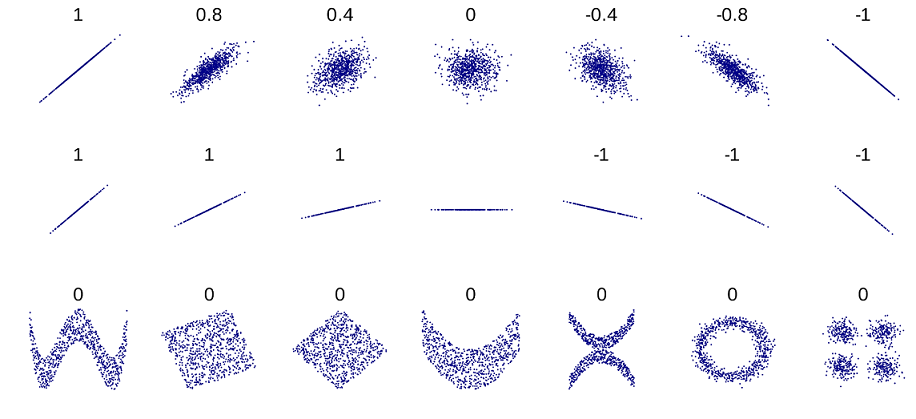

Usually in statistics there are 4 types of corelation measurement techniques,
1. **Pearson correlation:** This method evaluates the linear relationship between two continuous variables.
1. **Kendall rank correlation:** This method used to measure the ordinal association between two measured quantities. Kendall’s correlation coefficient uses pairs of observations and determines the strength of association based on the pattern on concordance and discordance between the pairs.
1. **Spearman correlation:** This method evaluates the monotonic relationship between two variable. This correlation coefficient is based on the ranked values for each variable rather than the raw data.
1. **Point-Biserial correlation:** A point-biserial correlation is used to measure the strength and direction of the association that exists between one continuous variable and one dichotomous variable. 
This is special case corelation measurement where, one of the variables is measured on a dichotomous scale.
Ex.This corelation can be used to determine whether there is an association between salaries (continuous variable) - measured in US dollars, and gender (dichotomous variable, which has two categories: "males" and "females").

A **dichotomous scale** is a two-point scale that presents options that are absolutely opposite to each other. Ex. Gender(Male/Female), Employment Status (employed or unemployed)


In [ ]:
miss_col = data_df.columns[data_df.isnull().any()]
miss_col

# Emprical Rule:

In statistics, the 68–95–99.7 rule, also known as the empirical rule, is a shorthand used to remember the percentage of values that lie within an interval estimate in a normal distribution: 68%, 95%, and 99.7% of the values lie within one, two, and three standard deviations of the mean, respectively.

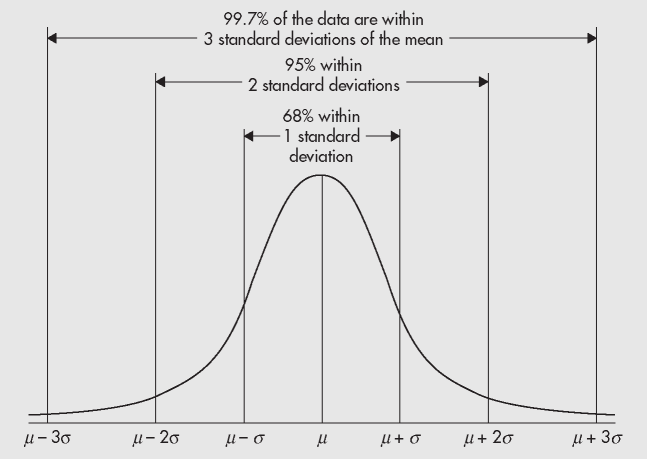

### Standard Deviation:
A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean. Low standard deviation means data are clustered around the mean, and high standard deviation indicates data are more spread out. A standard deviation close to zero indicates that data points are close to the mean, whereas a high or low standard deviation indicates data points are respectively above or below the mean.

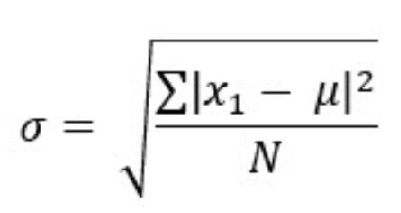

Here, 
* σ is the standard deviation, 
* x1 is the data point we are solving for in the set, 
* µ is the mean,  
* N is the total number of data points.

In [ ]:
skew_dt = ['F_1_12', 'F_1_13','F_3_19','F_3_21','F_4_2','F_4_3','F_4_8','F_4_9','F_4_10','F_4_14']

def data_impute():
    op_df = pd.DataFrame(columns=['row-col','value'])
    for col in miss_col:
        
        train = data_df.loc[(data_df[col].notnull())]
        test = data_df.loc[(data_df[col].isnull())]
                
        row_id = test["row_id"].astype(str)
        
        # F_2 columns have outliers, we can apply Median for those columns
        if col in skew_dt:
            val = train[col].median(axis = 0)
        else:
            val = train[col].mean(axis = 0)
        
        #Create a  DataFrame with the passengers ids and our prediction
        temp_df = pd.DataFrame({'row-col':row_id,'value':val})
        temp_df['row-col'] = temp_df['row-col'] +'-'+ col
        op_df = op_df.append(temp_df)
        
    return op_df

In [ ]:
submission = data_impute()

In [ ]:
submission.shape

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv',index=False)